In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from patsy import dmatrices
#import random

import sys
import os
os.chdir('C:/BankRisk')

In [2]:
import time
from time import gmtime, strftime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2017-04-28 11:04:44


In [3]:
grp='TestProd2'

In [4]:
## select time period: 2001-2014, 2001-2007, 2008-2014 (14y, 7y, 7y)
#r0 = '2001_2007'
#r0 = '2001_2014'
r0 = '2001_2010'
#r0 = '2009_2015'
ra = int(r0[0:4])
rb = int(r0[-4:])
r0, ra, rb

('2001_2010', 2001, 2010)

In [5]:
yr = pd.read_csv('yldreg_3mat_'+grp+'_'+r0+'.csv', index_col=0)
yrb = pd.read_csv('yldreg_3matbest_'+grp+'_'+r0+'.csv', index_col=0)

yrb

grp     prod mt1  mt2   mt3   mx1   mx2       dur       spd  \
1343  TestProd2      DDA  r0   r6  r120  0.00  0.05  4.117666 -5.693406   
59    TestProd2     r1.5  r1   r6  r120  0.40  0.15  1.998719 -2.809872   
291   TestProd2   r1.5_1  r6  r48  r120  0.55  0.10  1.844636 -2.734470   
1652  TestProd2      r12  r0   r1   r12  0.00  0.00  0.537588  0.000000   
1116  TestProd2    r12.5  r6  r48  r120  0.50  0.20  1.810781 -2.574428   
1271  TestProd2  r12.5_1  r6  r24   r48  0.45  0.05  1.137125 -2.132824   
417   TestProd2     r3.5  r3   r6  r120  0.35  0.20  2.038302 -2.803781   
621   TestProd2   r3.5_1  r6  r48  r120  0.55  0.25  1.488511 -2.457996   
1486  TestProd2       r6  r0   r1    r6  0.00  0.00  0.250000  0.000000   
683   TestProd2     r6.5  r0   r6  r120  0.00  0.55  2.082052 -2.773957   
949   TestProd2   r6.5_1  r6  r48   r60  0.55  0.35  1.057518 -2.127127   

            sd  
1343  0.604397  
59    0.300484  
291   0.243864  
1652  0.000000  
1116  0.240862  
1271  0.237223  
417   0.300824  
621   0.260405  
1486  0.000000  
683   0.304578  
949   0.294148

In [6]:
len(yrb)

11

In [7]:
yrm = yr.copy()
yrm['lng'] = yrm['mt3']

In [8]:
for i in np.arange(len(yrm)):
  if (yrm.ix[i]['mx1']+yrm.ix[i]['mx2'])<1:
    #yrm.loc[i,'lng'] = yrm.ix[i]['mt3']
    pass
  elif yrm.ix[i]['mx2']>0:
    yrm.loc[i,'lng'] = yrm.ix[i]['mt2']
  else: 
    yrm.loc[i,'lng'] = yrm.ix[i]['mt1']
  if int(i/100)*100 == i:
    print(i)

yrm.head()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


grp  prod mt1 mt2  mt3   mx1  mx2       dur       spd        sd  lng
0  TestProd2  r1.5  r0  r1   r3  0.25  0.1  0.085417 -1.342089  0.907300   r3
1  TestProd2  r1.5  r0  r1   r6  0.20  0.2  0.158333 -1.462785  0.875889   r6
2  TestProd2  r1.5  r0  r1  r12  0.00  0.5  0.289627 -1.552709  0.856415  r12
3  TestProd2  r1.5  r0  r1  r24  0.05  0.5  0.480679 -1.792312  0.693689  r24
4  TestProd2  r1.5  r0  r1  r36  0.00  0.6  0.621901 -1.938803  0.511192  r36

In [9]:
yrm['lng2'] = yrm.apply(lambda x:  x['lng'][1:],axis=1).astype(int)
yrm.tail()

grp prod  mt1  mt2   mt3  mx1  mx2       dur       spd        sd  \
1810  TestProd2  r12  r36  r84  r120  1.0  0.0  1.492252 -1.099114  1.379702   
1811  TestProd2  r12  r48  r60   r84  0.3  0.0  2.831944 -1.945487  1.633847   
1812  TestProd2  r12  r48  r60  r120  0.2  0.0  3.846395 -2.476642  1.623701   
1813  TestProd2  r12  r48  r84  r120  0.2  0.0  3.846395 -2.476642  1.623701   
1814  TestProd2  r12  r60  r84  r120  0.0  0.0  4.321228 -2.733480  1.626727   

       lng  lng2  
1810   r36    36  
1811   r84    84  
1812  r120   120  
1813  r120   120  
1814  r120   120

In [10]:
len(yrm) # 1815

1815

In [11]:
yrm2 = yrm.ix[yrm.groupby(['prod','lng2']).apply(lambda x: x['sd'].idxmin())]
len(yrm2) # 99

99

In [12]:
yrm2.to_csv('yldreg_3matlngfam_'+grp+'_'+r0+'.csv')

In [13]:
yrm2.groupby('prod').count()

grp  mt1  mt2  mt3  mx1  mx2  dur  spd  sd  lng  lng2
prod                                                          
DDA        9    9    9    9    9    9    9    9   9    9     9
r1.5       9    9    9    9    9    9    9    9   9    9     9
r1.5_1     9    9    9    9    9    9    9    9   9    9     9
r12        9    9    9    9    9    9    9    9   9    9     9
r12.5      9    9    9    9    9    9    9    9   9    9     9
r12.5_1    9    9    9    9    9    9    9    9   9    9     9
r3.5       9    9    9    9    9    9    9    9   9    9     9
r3.5_1     9    9    9    9    9    9    9    9   9    9     9
r6         9    9    9    9    9    9    9    9   9    9     9
r6.5       9    9    9    9    9    9    9    9   9    9     9
r6.5_1     9    9    9    9    9    9    9    9   9    9     9

In [14]:
yrm2.reset_index(drop=True,inplace=True)
yrm2['bst'] = np.nan
yrm2[yrm2['prod']=='r1.5']

grp  prod mt1  mt2   mt3   mx1   mx2       dur       spd        sd  \
9   TestProd2  r1.5  r0   r1    r3  0.25  0.10  0.085417 -1.342089  0.907300   
10  TestProd2  r1.5  r0   r1    r6  0.20  0.20  0.158333 -1.462785  0.875889   
11  TestProd2  r1.5  r0   r1   r12  0.00  0.50  0.289627 -1.552709  0.856415   
12  TestProd2  r1.5  r0   r1   r24  0.05  0.50  0.480679 -1.792312  0.693689   
13  TestProd2  r1.5  r0   r1   r36  0.00  0.60  0.621901 -1.938803  0.511192   
14  TestProd2  r1.5  r0   r1   r48  0.00  0.60  0.803825 -2.078873  0.382858   
15  TestProd2  r1.5  r1   r3   r60  0.45  0.10  1.104708 -2.315121  0.340007   
16  TestProd2  r1.5  r1  r60   r84  0.55  0.35  1.178946 -2.343091  0.339652   
17  TestProd2  r1.5  r1   r6  r120  0.40  0.15  1.998719 -2.809872  0.300484   

     lng  lng2  bst  
9     r3     3  NaN  
10    r6     6  NaN  
11   r12    12  NaN  
12   r24    24  NaN  
13   r36    36  NaN  
14   r48    48  NaN  
15   r60    60  NaN  
16   r84    84  NaN  
17  r120   120  NaN

In [15]:
yrm2.sort_index(inplace=True,by=['prod','dur','lng2'])
yrm2[['dur_1','sd_1']] = yrm2.groupby(['prod'])[['dur','sd']].shift(1)
yrm2[yrm2['prod']=='r1.5']

grp  prod mt1  mt2   mt3   mx1   mx2       dur       spd        sd  \
9   TestProd2  r1.5  r0   r1    r3  0.25  0.10  0.085417 -1.342089  0.907300   
10  TestProd2  r1.5  r0   r1    r6  0.20  0.20  0.158333 -1.462785  0.875889   
11  TestProd2  r1.5  r0   r1   r12  0.00  0.50  0.289627 -1.552709  0.856415   
12  TestProd2  r1.5  r0   r1   r24  0.05  0.50  0.480679 -1.792312  0.693689   
13  TestProd2  r1.5  r0   r1   r36  0.00  0.60  0.621901 -1.938803  0.511192   
14  TestProd2  r1.5  r0   r1   r48  0.00  0.60  0.803825 -2.078873  0.382858   
15  TestProd2  r1.5  r1   r3   r60  0.45  0.10  1.104708 -2.315121  0.340007   
16  TestProd2  r1.5  r1  r60   r84  0.55  0.35  1.178946 -2.343091  0.339652   
17  TestProd2  r1.5  r1   r6  r120  0.40  0.15  1.998719 -2.809872  0.300484   

     lng  lng2  bst     dur_1      sd_1  
9     r3     3  NaN       NaN       NaN  
10    r6     6  NaN  0.085417  0.907300  
11   r12    12  NaN  0.158333  0.875889  
12   r24    24  NaN  0.289627  0.856415  
13   r36    36  NaN  0.480679  0.693689  
14   r48    48  NaN  0.621901  0.511192  
15   r60    60  NaN  0.803825  0.382858  
16   r84    84  NaN  1.104708  0.340007  
17  r120   120  NaN  1.178946  0.339652

In [16]:
yrm2['slp'] = yrm2.apply(lambda x: (x['sd']-x['sd_1'])/(x['dur']-x['dur_1']),axis=1)
## remove all positive slopes, then recalc slopes
yrm2z = yrm2[(yrm2['slp']<0)|(yrm2['slp'].isnull())]  
yrm2z['prod_1'] = yrm2z['prod'].shift(1)
yrm2z[['dur_1','sd_1']] = yrm2z.groupby(['prod'])[['dur','sd']].shift(1)
## calc slope (unless it is 1st row for this product)
yrm2z['slp'] = yrm2z.apply(lambda x: (x['sd']-x['sd_1'])/(x['dur']-x['dur_1']) if x['prod']==x['prod_1'] else np.nan,axis=1)
yrm2z[yrm2z['prod']=='r1.5']


grp  prod mt1  mt2   mt3   mx1   mx2       dur       spd        sd  \
9   TestProd2  r1.5  r0   r1    r3  0.25  0.10  0.085417 -1.342089  0.907300   
10  TestProd2  r1.5  r0   r1    r6  0.20  0.20  0.158333 -1.462785  0.875889   
11  TestProd2  r1.5  r0   r1   r12  0.00  0.50  0.289627 -1.552709  0.856415   
12  TestProd2  r1.5  r0   r1   r24  0.05  0.50  0.480679 -1.792312  0.693689   
13  TestProd2  r1.5  r0   r1   r36  0.00  0.60  0.621901 -1.938803  0.511192   
14  TestProd2  r1.5  r0   r1   r48  0.00  0.60  0.803825 -2.078873  0.382858   
15  TestProd2  r1.5  r1   r3   r60  0.45  0.10  1.104708 -2.315121  0.340007   
16  TestProd2  r1.5  r1  r60   r84  0.55  0.35  1.178946 -2.343091  0.339652   
17  TestProd2  r1.5  r1   r6  r120  0.40  0.15  1.998719 -2.809872  0.300484   

     lng  lng2  bst     dur_1      sd_1       slp prod_1  
9     r3     3  NaN       NaN       NaN       NaN    DDA  
10    r6     6  NaN  0.085417  0.907300 -0.430772   r1.5  
11   r12    12  NaN  0.158333  0.875889 -0.148325   r1.5  
12   r24    24  NaN  0.289627  0.856415 -0.851739   r1.5  
13   r36    36  NaN  0.480679  0.693689 -1.292271   r1.5  
14   r48    48  NaN  0.621901  0.511192 -0.705427   r1.5  
15   r60    60  NaN  0.803825  0.382858 -0.142417   r1.5  
16   r84    84  NaN  1.104708  0.340007 -0.004777   r1.5  
17  r120   120  NaN  1.178946  0.339652 -0.047780   r1.5

In [17]:
ynull=yrm2z[yrm2z['slp'].isnull()]
ynull

grp     prod mt1 mt2 mt3   mx1  mx2       dur       spd        sd  \
0   TestProd2      DDA  r0  r1  r3  0.10  0.0  0.112500 -2.695362  1.818578   
9   TestProd2     r1.5  r0  r1  r3  0.25  0.1  0.085417 -1.342089  0.907300   
18  TestProd2   r1.5_1  r0  r1  r3  0.05  0.0  0.118750 -1.316192  0.905271   
27  TestProd2      r12  r0  r1  r3  0.00  0.0  0.125000  0.375197  0.573676   
36  TestProd2    r12.5  r0  r1  r3  0.00  0.0  0.125000 -1.177512  1.042127   
45  TestProd2  r12.5_1  r0  r1  r3  0.00  0.0  0.125000 -1.062833  1.145788   
54  TestProd2     r3.5  r0  r1  r3  0.05  0.0  0.118750 -1.347681  0.909289   
63  TestProd2   r3.5_1  r0  r1  r3  0.00  0.0  0.125000 -1.252067  0.952581   
72  TestProd2       r6  r0  r1  r3  0.00  0.0  0.125000  0.198830  0.275367   
81  TestProd2     r6.5  r0  r1  r3  0.00  0.0  0.125000 -1.265695  0.960034   
90  TestProd2   r6.5_1  r0  r1  r3  0.00  0.0  0.125000 -1.153588  1.035100   

   lng  lng2  bst  dur_1  sd_1  slp   prod_1  
0   r3     3  NaN    NaN   NaN  NaN      NaN  
9   r3     3  NaN    NaN   NaN  NaN      DDA  
18  r3     3  NaN    NaN   NaN  NaN     r1.5  
27  r3     3  NaN    NaN   NaN  NaN   r1.5_1  
36  r3     3  NaN    NaN   NaN  NaN      r12  
45  r3     3  NaN    NaN   NaN  NaN    r12.5  
54  r3     3  NaN    NaN   NaN  NaN  r12.5_1  
63  r3     3  NaN    NaN   NaN  NaN     r3.5  
72  r3     3  NaN    NaN   NaN  NaN   r3.5_1  
81  r3     3  NaN    NaN   NaN  NaN       r6  
90  r3     3  NaN    NaN   NaN  NaN     r6.5

In [18]:
######################################################################################
## get min (steepest) point, divide by 4 as filter for candidate points:
rtyp = 4
######################################################################################
slpn = yrm2z[['prod','slp']].ix[yrm2z.groupby(['prod']).apply(lambda x: x['slp'].idxmin())]
slpn.rename(columns={'slp':'slpn'},inplace=True)
yrm2a = yrm2z.merge(slpn,on='prod')
yrm2b=yrm2a[yrm2a['slp']<(yrm2a['slpn']/rtyp)]  ## selection ratio here:  1/3 works well
#yrm2b[yrm2b['prod']=='qyCard']
yrm3 = yrm2b.ix[yrm2b.groupby(['prod']).apply(lambda x: x['dur'].idxmax())]
yrm3['bst'] = 'x'
yrm3

grp     prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
5   TestProd2      DDA  r0   r1  r48  0.00  0.15  1.661253 -4.256987   
13  TestProd2     r1.5  r0   r1  r48  0.00  0.60  0.803825 -2.078873   
22  TestProd2   r1.5_1  r1   r6  r48  0.15  0.45  0.897575 -2.143886   
30  TestProd2      r12  r0   r1  r12  0.00  0.00  0.537588  0.000000   
36  TestProd2    r12.5  r1   r6  r48  0.10  0.40  1.077698 -2.153256   
44  TestProd2  r12.5_1  r6  r24  r48  0.45  0.05  1.137125 -2.132824   
51  TestProd2     r3.5  r1   r3  r48  0.20  0.40  0.837158 -2.062842   
60  TestProd2   r3.5_1  r0   r6  r48  0.00  0.60  0.928825 -2.114751   
65  TestProd2       r6  r0   r1   r6  0.00  0.00  0.250000  0.000000   
72  TestProd2     r6.5  r3   r6  r48  0.35  0.20  0.969928 -2.126480   
81  TestProd2   r6.5_1  r0   r6  r48  0.00  0.55  1.013678 -2.099786   

          sd  lng  lng2 bst     dur_1      sd_1       slp   prod_1      slpn  
5   0.761571  r48    48   x  1.274664  1.018613 -0.664897      DDA -1.038853  
13  0.382858  r48    48   x  0.621901  0.511192 -0.705427     r1.5 -1.292271  
22  0.278532  r48    48   x  0.746513  0.399231 -0.799002   r1.5_1 -1.148085  
30  0.000000  r12    12   x  0.469064  0.199690 -2.914167      r12 -2.914167  
36  0.275225  r48    48   x  0.870739  0.394916 -0.578330    r12.5 -1.809594  
44  0.237223  r48    48   x  0.982851  0.316106 -0.511315  r12.5_1 -1.195424  
51  0.381943  r48    48   x  0.698597  0.498107 -0.838354     r3.5 -1.081578  
60  0.277645  r48    48   x  0.784013  0.396343 -0.819669   r3.5_1 -1.212694  
65  0.000000   r6     6   x  0.216103  0.252390 -7.445825       r6 -7.445825  
72  0.378335  r48    48   x  0.746513  0.495705 -0.525344     r6.5 -1.175776  
81  0.295466  r48    48   x  0.871126  0.397336 -0.714617   r6.5_1 -1.318572

In [19]:
yrm4 = pd.concat([yrm3,ynull],axis=0)
yrm4 = yrm4[yrm3.columns]
yrm4.sort_index(by='prod',inplace=True)
yrm4.reset_index(drop=True,inplace=True)
yrm5 = yrm4.ix[yrm4.groupby(['prod']).apply(lambda x: x['sd'].idxmin())]
yrm5

grp     prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
0   TestProd2      DDA  r0   r1  r48  0.00  0.15  1.661253 -4.256987   
2   TestProd2     r1.5  r0   r1  r48  0.00  0.60  0.803825 -2.078873   
4   TestProd2   r1.5_1  r1   r6  r48  0.15  0.45  0.897575 -2.143886   
6   TestProd2      r12  r0   r1  r12  0.00  0.00  0.537588  0.000000   
8   TestProd2    r12.5  r1   r6  r48  0.10  0.40  1.077698 -2.153256   
10  TestProd2  r12.5_1  r6  r24  r48  0.45  0.05  1.137125 -2.132824   
12  TestProd2     r3.5  r1   r3  r48  0.20  0.40  0.837158 -2.062842   
14  TestProd2   r3.5_1  r0   r6  r48  0.00  0.60  0.928825 -2.114751   
17  TestProd2       r6  r0   r1   r6  0.00  0.00  0.250000  0.000000   
19  TestProd2     r6.5  r3   r6  r48  0.35  0.20  0.969928 -2.126480   
20  TestProd2   r6.5_1  r0   r6  r48  0.00  0.55  1.013678 -2.099786   

          sd  lng  lng2 bst     dur_1      sd_1       slp   prod_1      slpn  
0   0.761571  r48    48   x  1.274664  1.018613 -0.664897      DDA -1.038853  
2   0.382858  r48    48   x  0.621901  0.511192 -0.705427     r1.5 -1.292271  
4   0.278532  r48    48   x  0.746513  0.399231 -0.799002   r1.5_1 -1.148085  
6   0.000000  r12    12   x  0.469064  0.199690 -2.914167      r12 -2.914167  
8   0.275225  r48    48   x  0.870739  0.394916 -0.578330    r12.5 -1.809594  
10  0.237223  r48    48   x  0.982851  0.316106 -0.511315  r12.5_1 -1.195424  
12  0.381943  r48    48   x  0.698597  0.498107 -0.838354     r3.5 -1.081578  
14  0.277645  r48    48   x  0.784013  0.396343 -0.819669   r3.5_1 -1.212694  
17  0.000000   r6     6   x  0.216103  0.252390 -7.445825       r6 -7.445825  
19  0.378335  r48    48   x  0.746513  0.495705 -0.525344     r6.5 -1.175776  
20  0.295466  r48    48   x  0.871126  0.397336 -0.714617   r6.5_1 -1.318572

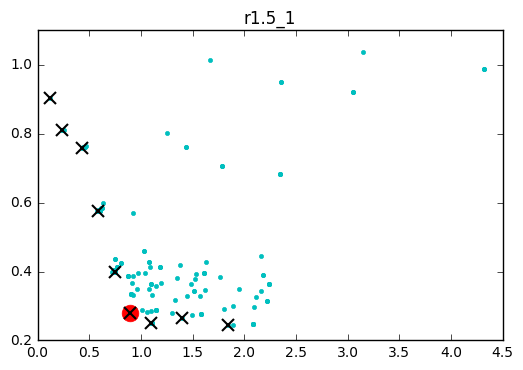

In [20]:
pr = 'r1.5_1'
olp = yrm[yrm['prod']==pr]
ols = yrm2[yrm2['prod']==pr]
ols3 = yrm5[yrm5['prod']==pr]
plt.plot(olp['dur'],olp['sd'],ls=' ',marker='.',mec='c',c='c')
plt.plot(ols3['dur'],ols3['sd'],ls=' ',marker='o',ms=12,c='r',mec='r')
plt.plot(ols['dur'],ols['sd'],ls=' ',marker='x',mec='k',ms=8,mew=1.5)
#plt.xlim([0,1])
#plt.ylim([0,1.5])
#plt.savefig('OthLnLs_lngfam.png', dpi=400, bbox_inches='tight')
plt.title(pr)
plt.show()

In [21]:
ols3

grp    prod mt1 mt2  mt3   mx1   mx2       dur       spd        sd  \
4  TestProd2  r1.5_1  r1  r6  r48  0.15  0.45  0.897575 -2.143886  0.278532   

   lng  lng2 bst     dur_1      sd_1       slp  prod_1      slpn  
4  r48    48   x  0.746513  0.399231 -0.799002  r1.5_1 -1.148085

In [22]:
yrm5.to_csv('yldreg_3mataltbest_FDIC_'+grp+'_'+r0+'_exp.csv')
len(yrm5)

11

In [23]:
list(yrm5['prod'])

['DDA',
 'r1.5',
 'r1.5_1',
 'r12',
 'r12.5',
 'r12.5_1',
 'r3.5',
 'r3.5_1',
 'r6',
 'r6.5',
 'r6.5_1']

In [24]:
p9 = ['r1.5','r1.5_1','r3.5','r3.5_1','r6.5','r6.5_1','r12.5','r12.5_1','DDA']
p9

['r1.5',
 'r1.5_1',
 'r3.5',
 'r3.5_1',
 'r6.5',
 'r6.5_1',
 'r12.5',
 'r12.5_1',
 'DDA']

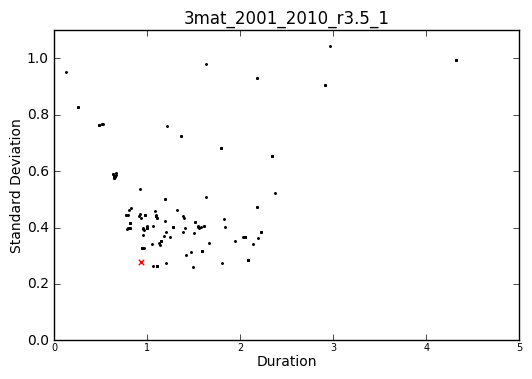

In [25]:
i = 3
#p9 = ['qyRE','qyCI','qyCsmr','qyTotSec','qyOAstIB','DDA','qrSavNow','qrCD','qrOLbIB']

if 1==1:
  plt.scatter(yr[yr['prod']==p9[i]]['dur'],yr[yr['prod']==p9[i]]['sd'],c='k',marker = '.',s=5)
  plt.scatter(yrm3[yrm3['prod']==p9[i]]['dur'],yrm3[yrm3['prod']==p9[i]]['sd'],c='r',marker = 'x',s=15)
  plt.ylim(ymin=0)
  plt.ylabel('Standard Deviation',labelpad=2)
  plt.title('3mat_'+r0+'_'+p9[i])
  plt.xlim(0,5)

  labl = 'on'
  plt.xlabel('Duration',labelpad=2)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    pad = 1.4,        # move labels closer to frame
    labelsize = 7,    # decrease font size of year labels
    labelbottom=labl) # labels along the bottom edge are off

plt.show()

In [26]:
yrm3[yrm3['prod']==p9[i]]

grp    prod mt1 mt2  mt3  mx1  mx2       dur       spd        sd  \
60  TestProd2  r3.5_1  r0  r6  r48  0.0  0.6  0.928825 -2.114751  0.277645   

    lng  lng2 bst     dur_1      sd_1       slp  prod_1      slpn  
60  r48    48   x  0.784013  0.396343 -0.819669  r3.5_1 -1.212694

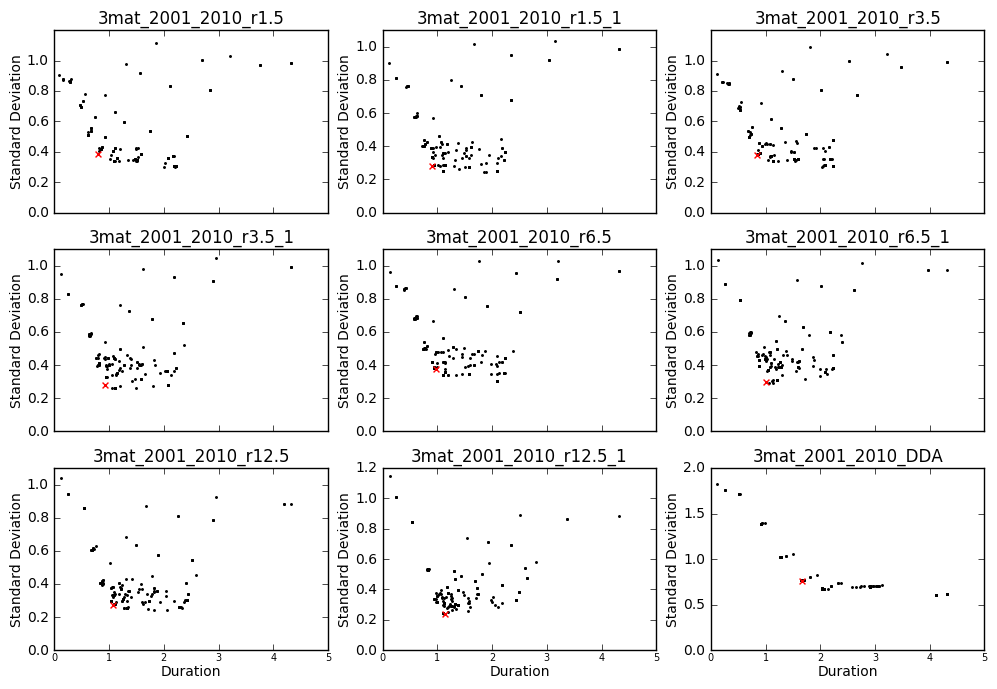

In [27]:
###### plt.rcParams.update({'font.size': 7})
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2, plSize[1]*2) )  ## double width, single height

for i in np.arange(9):
  plt.subplot(3, 3, i+1)
  plt.scatter(yr[yr['prod']==p9[i]]['dur'],yr[yr['prod']==p9[i]]['sd'],c='k',marker = '.',s=5)
  plt.scatter(yrm3[yrm3['prod']==p9[i]]['dur'],yrm3[yrm3['prod']==p9[i]]['sd'],c='r',marker = 'x',s=18)
  plt.ylim(ymin=0)
  plt.ylabel('Standard Deviation',labelpad=2)
  plt.title('3mat_'+r0+'_'+p9[i])
  plt.xlim(0,5)

  if i < 6:
    labl = 'off'
    plt.xlabel('',labelpad=2)
  else:
    labl = 'on'
    plt.xlabel('Duration',labelpad=2)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    pad = 1.4,        # move labels closer to frame
    labelsize = 7,    # decrease font size of year labels
    labelbottom=labl) # labels along the bottom edge are off

plt.savefig('3mat_'+grp+'_'+r0+'_'+str(rtyp)+'.png', dpi=400, bbox_inches='tight')
plt.show()

In [28]:
yre=pd.concat([yrb,yrm5]).drop_duplicates().reset_index(drop=True)
#yre = yrm3.copy()
yre['dur2'] = yre.apply(lambda x: round(x['dur'],2),axis=1)
yre['sd2'] = yre.apply(lambda x: round(x['sd'],2),axis=1)
len(yre)

22

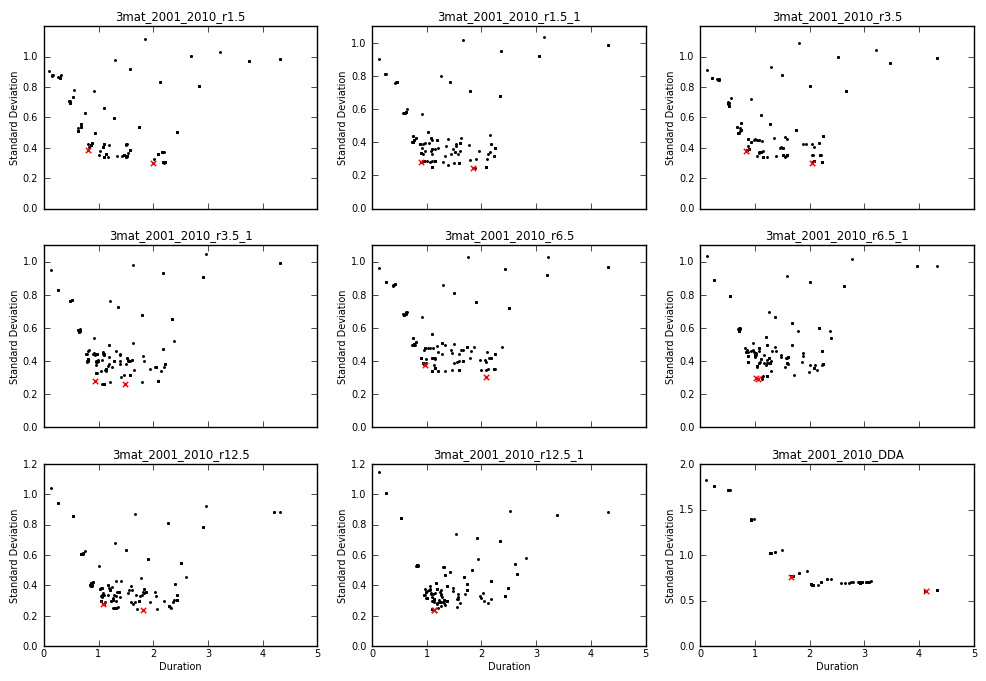

In [29]:
plt.rcParams.update({'font.size': 7})
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2, plSize[1]*2) )  ## double width, single height

for i in np.arange(9):
  plt.subplot(3, 3, i+1)
  plt.scatter(yr[yr['prod']==p9[i]]['dur'],yr[yr['prod']==p9[i]]['sd'],c='k',marker = '.',s=5)
  plt.scatter(yre[yre['prod']==p9[i]]['dur'],yre[yre['prod']==p9[i]]['sd'],c='r',marker = 'x',s=15)
  plt.ylim(ymin=0)
  plt.ylabel('Standard Deviation',labelpad=2)
  plt.title('3mat_'+r0+'_'+p9[i])
  plt.xlim(0,5)

  if i < 6:
    labl = 'off'
    plt.xlabel('',labelpad=2)
  else:
    labl = 'on'
    plt.xlabel('Duration',labelpad=2)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    pad = 1.4,        # move labels closer to frame
    labelsize = 7,    # decrease font size of year labels
    labelbottom=labl) # labels along the bottom edge are off

plt.savefig('3mat_altbest_'+grp+'_'+r0+'_'+str(rtyp)+'.png', dpi=400, bbox_inches='tight')
plt.show()

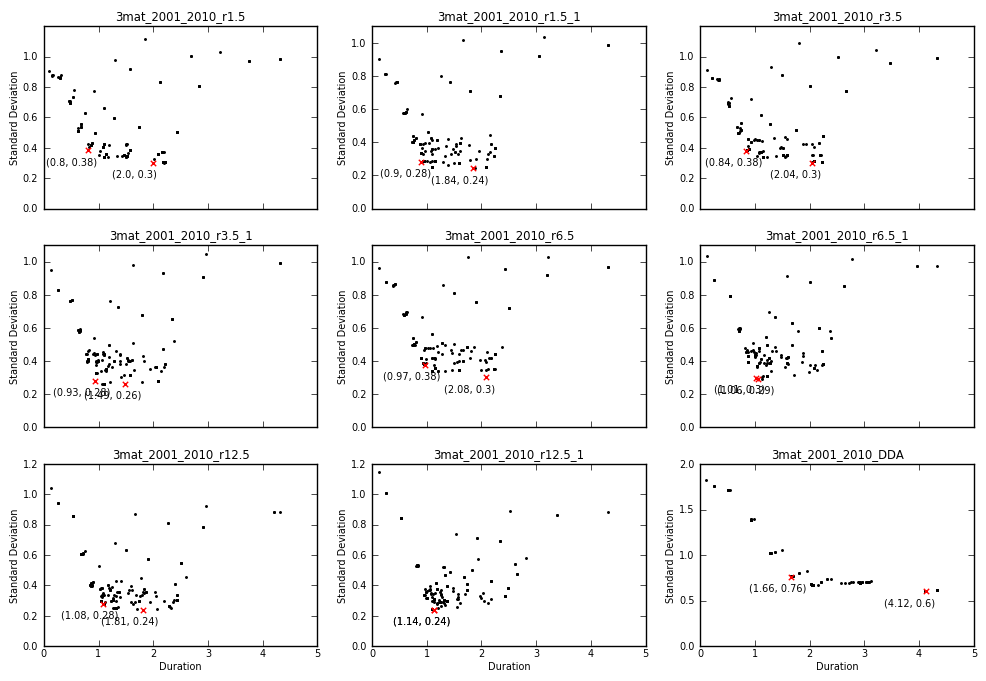

In [30]:
plt.rcParams.update({'font.size': 7})
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2, plSize[1]*2) )  ## double width, single height

for i in np.arange(9):
  plt.subplot(3, 3, i+1)
  plt.scatter(yr[yr['prod']==p9[i]]['dur'],yr[yr['prod']==p9[i]]['sd'],c='k',marker = '.',s=5)
  plt.scatter(yre[yre['prod']==p9[i]]['dur'],yre[yre['prod']==p9[i]]['sd'],c='r',marker = 'x',s=15)
  plt.ylim(ymin=0)
  plt.ylabel('Standard Deviation',labelpad=2)
  plt.title('3mat_'+r0+'_'+p9[i])
  plt.xlim(0,5)
  for xy in zip(yre[yre['prod']==p9[i]]['dur2'], yre[yre['prod']==p9[i]]['sd2']): # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, xytext=(-30,-10),textcoords='offset points') # <--

  if i < 6:
    labl = 'off'
    plt.xlabel('',labelpad=2)
  else:
    labl = 'on'
    plt.xlabel('Duration',labelpad=2)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    pad = 1.4,        # move labels closer to frame
    labelsize = 7,    # decrease font size of year labels
    labelbottom=labl) # labels along the bottom edge are off

plt.savefig('3mat_altbest2_'+grp+'_'+r0+'_'+str(rtyp)+'.png', dpi=400, bbox_inches='tight')
plt.show()

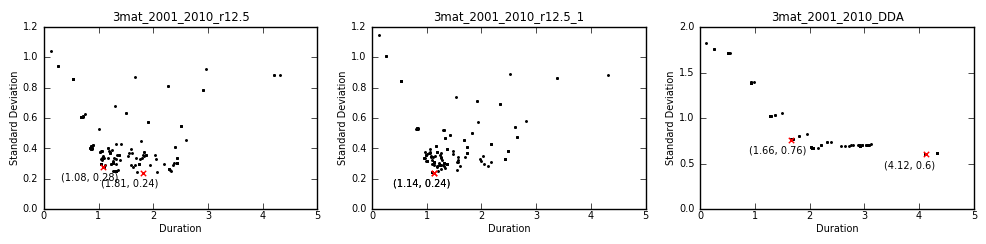

In [31]:
plt.rcParams.update({'font.size': 7})
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2, plSize[1]*2) )  ## double width, single height
j=1

for i in [6,7,8]:
  plt.subplot(3, 3, j)
  plt.scatter(yr[yr['prod']==p9[i]]['dur'],yr[yr['prod']==p9[i]]['sd'],c='k',marker = '.',s=5)
  plt.scatter(yre[yre['prod']==p9[i]]['dur'],yre[yre['prod']==p9[i]]['sd'],c='r',marker = 'x',s=15)
  plt.ylim(ymin=0)
  plt.ylabel('Standard Deviation',labelpad=2)
  plt.title('3mat_'+r0+'_'+p9[i])
  plt.xlim(0,5)
  for xy in zip(yre[yre['prod']==p9[i]]['dur2'], yre[yre['prod']==p9[i]]['sd2']): # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, xytext=(-30,-10),textcoords='offset points') # <--

  if i < 0:
    labl = 'off'
    plt.xlabel('',labelpad=2)
  else:
    labl = 'on'
    plt.xlabel('Duration',labelpad=2)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    pad = 1.4,        # move labels closer to frame
    labelsize = 7,    # decrease font size of year labels
    labelbottom=labl) # labels along the bottom edge are off
  j = j+1

plt.savefig('3mat_special3a_'+grp+'_'+r0+'_'+str(rtyp)+'.png', dpi=400, bbox_inches='tight') # 3a: annotated markers
plt.show()

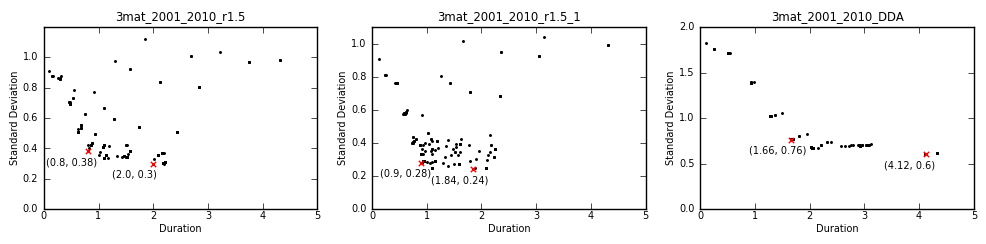

In [32]:
plt.rcParams.update({'font.size': 7})
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2, plSize[1]*2) )  ## double width, single height
j=1

for i in [0,1,8]:
  plt.subplot(3, 3, j)
  plt.scatter(yr[yr['prod']==p9[i]]['dur'],yr[yr['prod']==p9[i]]['sd'],c='k',marker = '.',s=5)
  plt.scatter(yre[yre['prod']==p9[i]]['dur'],yre[yre['prod']==p9[i]]['sd'],c='r',marker = 'x',s=15)
  plt.ylim(ymin=0)
  plt.ylabel('Standard Deviation',labelpad=2)
  plt.title('3mat_'+r0+'_'+p9[i])
  plt.xlim(0,5)
  for xy in zip(yre[yre['prod']==p9[i]]['dur2'], yre[yre['prod']==p9[i]]['sd2']): # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, xytext=(-30,-10),textcoords='offset points') # <--

  if i < 0:
    labl = 'off'
    plt.xlabel('',labelpad=2)
  else:
    labl = 'on'
    plt.xlabel('Duration',labelpad=2)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    pad = 1.4,        # move labels closer to frame
    labelsize = 7,    # decrease font size of year labels
    labelbottom=labl) # labels along the bottom edge are off
  j = j+1

plt.savefig('3mat_special3b_'+grp+'_'+r0+'_'+str(rtyp)+'.png', dpi=400, bbox_inches='tight') # 3b: 1.5, 1.5_1, DDA
plt.show()

In [33]:
#ybst=yrm4[yrm4['prod'].isin(p9s)][['prod','dur']]
ybst=yrm5[['prod','dur']]
ybst

prod       dur
0       DDA  1.661253
2      r1.5  0.803825
4    r1.5_1  0.897575
6       r12  0.537588
8     r12.5  1.077698
10  r12.5_1  1.137125
12     r3.5  0.837158
14   r3.5_1  0.928825
17       r6  0.250000
19     r6.5  0.969928
20   r6.5_1  1.013678

In [34]:
ddct = dict(zip(ybst['prod'],ybst['dur']))
ddct

{'DDA': 1.6612531511109747,
 'r1.5': 0.80382501228751735,
 'r1.5_1': 0.89757501228751746,
 'r12': 0.53758767769772742,
 'r12.5': 1.0776979320260636,
 'r12.5_1': 1.1371252078451144,
 'r3.5': 0.8371583456208509,
 'r3.5_1': 0.92882501228751724,
 'r6': 0.25,
 'r6.5': 0.96992813882345708,
 'r6.5_1': 1.013678138823457}

In [35]:
## stop here